Ex : spring-mass-damper system

(101, 101)


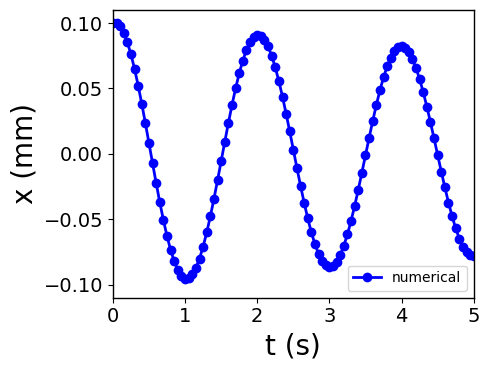

In [ ]:
import numpy as np
import statistics
from scipy.linalg import solve
from matplotlib import pyplot as plt

t_max = 5;
n_max = 101;

m=1; c=0.1; k=10;

h = 0.1;
v_ini=0;

t_domain = np.linspace(0, t_max, n_max)
res = [t_domain[i + 1] - t_domain[i] for i in range(len(t_domain)-1)]
dt = statistics.mean(res)

#lhs side
A1=np.zeros((n_max,n_max));
A2=np.zeros((n_max,n_max));
A3=np.zeros((n_max,n_max));

for i in range(2,n_max):
  A1[i,i-2]=1;
  A1[i,i-1]=-2;
  A1[i,i]=1;
  A2[i,i-2]=-1;
  A2[i,i]=1;
  A3[i,i-1]=1;

# Bcs for whole matrix
A=(m/(dt*dt))*A1+(c/(2*dt))*A2+k*A3;
print(np.shape(A))

A[0,0]=1;
A[1,0]=-1;
A[1,1]=1;


#rhs side
b=np.zeros((n_max,1))

b[0,0]=h
b[1,0]=v_ini*dt
#

X = np.linalg.inv(A).dot(b)
#X_A=

#print(X)
#print(X_A)

plt.rcParams["figure.figsize"] = [5,3.8]
plt.rcParams["figure.autolayout"] = True
plt.rcParams['axes.linewidth'] = 1
plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)

#h1, =plt.plot(t_domain,X_A,'r-',linewidth=2,label="analytical")
h2, =plt.plot(t_domain,X,'bo-',linewidth=2,label="numerical")

plt.xlabel('t (s)',fontsize=20)
plt.ylabel('x (mm)',fontsize=20)

plt.xlim(0,t_max)
plt.ylim(-1.1*h,1.1*h)
plt.margins(x=0, y=0)

#
first_legend = plt.legend(handles=[h2], loc='lower right')
plt.show()